# Proyecto Final Bienes Raices Mexico 2013-2016

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importar Datos de Ventas y Rentas de Bienes Raices en Mexico de 2013 a 2016

In [2]:
# Se utiliza el 'latin' encoding ya que contiene descripciones de los inmuebles
data = pd.read_csv('real_estate_mex_2013_2016.csv', encoding = 'latin')
data.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,NaN,"20.627527,-87.076686",20.627527,-87.076686,269000.0,...,110.0,2445.454545,2445.454545,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o6...,Referencia #28010. En el centro de Playa del C...,Departamento en Venta. Ref. #28010. 3 Dormitor...,https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...
1,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,NaN,"20.627567,-87.076718",20.627567,-87.076718,230000.0,...,110.0,2090.909091,2090.909091,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o8...,Referencia #28925. En el centro de Playa del C...,Departamento en Venta. Ref. #28925. 3 Dormitor...,https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...
2,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,NaN,"20.6267,-87.075866",20.626700,-87.075866,135000.0,...,41.0,3292.682927,3292.682927,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o9...,Referencia #29031. La Papaya un proyecto altam...,Departamento en Venta. Ref. #29031. 1 Dormitor...,https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...
3,19/09/2013,sell,apartment,Playa del Carmen,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,NaN,"20.635482,-87.070345",20.635482,-87.070345,185000.0,...,122.0,1516.393443,1516.393443,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29032. Visite las nuevas Acqua Ter...,Departamento en Venta. Ref. #29032. 2 Dormitor...,https://thumbs-cf.properati.com/0/Mxv1JulyoQBM...
4,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,NaN,"20.629092,-87.074658",20.629092,-87.074658,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ok...,Referencia #33970. TodavÃ­a tenemos algunas un...,Departamento en Venta. Ref. #33970. Encanto Ri...,https://thumbs-cf.properati.com/9/jzkZFLJUFVEw...


## Analisis de Tabla de Datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188525 entries, 0 to 188524
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  188525 non-null  object 
 1   operation                   188525 non-null  object 
 2   property_type               188525 non-null  object 
 3   place_name                  188525 non-null  object 
 4   place_with_parent_names     188525 non-null  object 
 5   geonames_id                 1 non-null       float64
 6   lat-lon                     156591 non-null  object 
 7   lat                         156591 non-null  float64
 8   lon                         156591 non-null  float64
 9   price                       185911 non-null  float64
 10  currency                    185911 non-null  object 
 11  price_aprox_local_currency  185911 non-null  float64
 12  price_aprox_usd             185911 non-null  float64
 13  surface_total_

_Observamos que existen 188,525 registros en total, con variables como fechas, tipo de operaciones, tipo de propiedad, nombre del lugar, descripción más detallada del lugar, variables geograficas, precio, moneda, superficie, piso, numero de habitaciones, descripciones, etc._

## Datos Nulos por Variable

In [4]:
# Suma de Nulos por variable
nulos = pd.DataFrame(data.isnull().sum(), columns = ['Nulos'])
# Agrega porcentaje de nulos con respecto al total de registros
nulos['%_Nulos'] = round(nulos['Nulos']/data.shape[0] * 100, 2).values
nulos

,Nulos,%_Nulos
created_on,0,0.00
operation,0,0.00
property_type,0,0.00
place_name,0,0.00
place_with_parent_names,0,0.00
geonames_id,188524,100.00
lat-lon,31934,16.94
lat,31934,16.94
lon,31934,16.94
price,2614,1.39


_Algunas variables como geonames_id que tiene un solo dato o expense con 207 datos seran eliminados ya que contienen mas del 90% de información nula_

## Eliminar Variables con un Porcentaje Mayor del 50% de Informacion Nula

In [5]:
# Nombres de columnas mayores con más del 50% de nulos
col_null = nulos[nulos['%_Nulos'] > 50].index

# Eliminar dichas columnas del data frame original
df = data.drop(col_null, axis = 1)

# Porcentaje de Nulos
round(df.isnull().sum()/df.shape[0] * 100, 2)

created_on                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.00
place_with_parent_names        0.00
lat-lon                       16.94
lat                           16.94
lon                           16.94
price                          1.39
currency                       1.39
price_aprox_local_currency     1.39
price_aprox_usd                1.39
surface_total_in_m2           48.21
surface_covered_in_m2          3.95
price_per_m2                  11.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.93
dtype: float64

## Analisis y Separación de la Variable place_with_parent_names

In [6]:
df['place_with_parent_names'][0]

'|MÃ©xico|Quintana Roo|Solidaridad|Playa del Carmen|Nuevo Centro Urbano|'

_En la mayoria de los casos los nombres se dividen en país, estados, municipio y colonia_

In [7]:
# Número de Registros en la mayoría de los casos
df['place_with_parent_names'].map(lambda x: len(x.split('|')[1:])).value_counts()

4    139874
5     35146
6      8989
3      4516
Name: place_with_parent_names, dtype: int64

_Se utilizaran los 4 primeros datos en cada uno de los registros, al ser un a analisis de Mexico se eliminaran las columnas con distintos pais, la columna pais sera eliminada_

In [8]:
pais = df['place_with_parent_names'].map(lambda x: x.split('|')[1])
estado = df['place_with_parent_names'].map(lambda x: x.split('|')[2])
municipio = df['place_with_parent_names'].map(lambda x: x.split('|')[3])
colonia = df['place_with_parent_names'].map(lambda x: x.split('|')[4:])

In [9]:
# Relleno de Nan
for i in range(len(colonia)):
    try:
        # Si la colonia es vacia
        if colonia[i][0] == '':
            colonia[i][0] = np.nan
    except:
        # Si no existe la colina
        colonia[i].append(np.nan)

In [10]:
# Solo un elemento
colonia = colonia.map(lambda x: x[0])

In [11]:
# Agregar nuevos elementos al data frame
df['pais'] = pais
df['estado'] = estado
df['municipio'] = municipio
df['colonia'] = colonia

In [12]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_per_m2,properati_url,description,title,image_thumbnail,pais,estado,municipio,colonia
0,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,"20.627527,-87.076686",20.627527,-87.076686,269000.0,USD,...,110.0,2445.454545,http://nuevo-centro-urbano.properati.com.mx/o6...,Referencia #28010. En el centro de Playa del C...,Departamento en Venta. Ref. #28010. 3 Dormitor...,https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...,MÃ©xico,Quintana Roo,Solidaridad,Playa del Carmen
1,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,"20.627567,-87.076718",20.627567,-87.076718,230000.0,USD,...,110.0,2090.909091,http://nuevo-centro-urbano.properati.com.mx/o8...,Referencia #28925. En el centro de Playa del C...,Departamento en Venta. Ref. #28925. 3 Dormitor...,https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...,MÃ©xico,Quintana Roo,Solidaridad,Playa del Carmen
2,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,"20.6267,-87.075866",20.626700,-87.075866,135000.0,USD,...,41.0,3292.682927,http://nuevo-centro-urbano.properati.com.mx/o9...,Referencia #29031. La Papaya un proyecto altam...,Departamento en Venta. Ref. #29031. 1 Dormitor...,https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...,MÃ©xico,Quintana Roo,Solidaridad,Playa del Carmen
3,19/09/2013,sell,apartment,Playa del Carmen,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,"20.635482,-87.070345",20.635482,-87.070345,185000.0,USD,...,122.0,1516.393443,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29032. Visite las nuevas Acqua Ter...,Departamento en Venta. Ref. #29032. 2 Dormitor...,https://thumbs-cf.properati.com/0/Mxv1JulyoQBM...,MÃ©xico,Quintana Roo,Solidaridad,Playa del Carmen
4,19/09/2013,sell,apartment,Nuevo Centro Urbano,|MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...,"20.629092,-87.074658",20.629092,-87.074658,180000.0,USD,...,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ok...,Referencia #33970. TodavÃ­a tenemos algunas un...,Departamento en Venta. Ref. #33970. Encanto Ri...,https://thumbs-cf.properati.com/9/jzkZFLJUFVEw...,MÃ©xico,Quintana Roo,Solidaridad,Playa del Carmen


In [13]:
# Paises distitnos de Mexico
df['pais'].value_counts()

MÃ©xico                       188068
Brasil                           456
Estados Unidos de AmÃ©rica         1
Name: pais, dtype: int64

In [14]:
# Eliminar Paises distinto de Mexico
df = df[df['pais'] == 'MÃ©xico'].reset_index(drop = True)

# Eliminar Columna pais ya que todo son Mexico
df.drop(['pais'], axis = 1, inplace = True)
# Eliminar columna place_with_parent_names y place_name
df.drop(['place_with_parent_names', 'place_name'], axis = 1, inplace = True)

## Eliminar Variable lat-lon

_Esta variable sera eliminada ya que existen variables independientes con la misma información_

In [15]:
df.iloc[:, 3:5].isnull().sum()

lat-lon    31934
lat        31934
dtype: int64

_Observamos la misma cantidad de null en ambas variables, lo que indica que estan relacionadas_

In [16]:
# Elimnar lat-lon
df.drop(['lat-lon'], axis = 1, inplace = True)

## Cambio de Nombres de Variables

In [17]:
# Observamos el nombre de las variables
list(df.columns)

['created_on',
 'operation',
 'property_type',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_per_m2',
 'properati_url',
 'description',
 'title',
 'image_thumbnail',
 'estado',
 'municipio',
 'colonia']

In [18]:
continuas = ['lat', 'lon', 'price', 'price_aprox_local_currency', 'price_aprox_usd',
            'surface_total_in_m2', 'surface_covered_in_m2', 'price_per_m2']
discretas = ['operation', 'property_type', 'currency', 'estado', 'municipio', 'colonia']
fechas = ['created_on']
text = ['properati_url', 'description', 'title', 'image_thumbnail']

In [19]:
# Renombrar variables continuas
df.rename(columns = dict(zip(continuas, list(map(lambda x: 'c_' + x, continuas)))), inplace = True)
# Renombrar variables discretas
df.rename(columns = dict(zip(discretas, list(map(lambda x: 'v_' + x, discretas)))), inplace = True)
# Renombrar variables fecha
df.rename(columns = dict(zip(fechas, list(map(lambda x: 'd_' + x, fechas)))), inplace = True)
# Renombrar variables continuas
df.rename(columns = dict(zip(text, list(map(lambda x: 't_' + x, text)))), inplace = True)

## Estadistica Descriptiva

In [20]:
df.describe(percentiles = [x / 10 for x in range(1, 10)])

,c_lat,c_lon,c_price,c_price_aprox_local_currency,c_price_aprox_usd,c_surface_total_in_m2,c_surface_covered_in_m2,c_price_per_m2
count,156134.000000,156134.000000,1.854540e+05,1.854540e+05,1.854540e+05,97630.000000,1.806350e+05,1.669080e+05
mean,21.034042,-99.013353,2.559722e+06,3.183243e+06,1.692449e+05,448.098812,1.993314e+03,1.624773e+04
std,2.973528,5.170212,6.038333e+06,7.963734e+06,4.234115e+05,3017.154134,5.637098e+05,5.318321e+05
min,14.843818,-117.228632,5.000000e+01,9.404200e+02,5.000000e+01,-396.000000,-3.240000e+02,8.000000e-03
10%,18.917542,-103.438171,1.350000e+04,1.486416e+04,7.902900e+02,0.000000,4.600000e+01,9.976033e+01
20%,19.161508,-101.002460,1.550000e+05,2.526931e+05,1.343505e+04,35.000000,7.000000e+01,1.813672e+03
30%,19.367960,-100.356804,5.800000e+05,6.720197e+05,3.572958e+04,90.000000,9.000000e+01,6.428571e+03
40%,19.454332,-99.603079,9.500000e+05,1.090307e+06,5.796887e+04,120.000000,1.200000e+02,8.333333e+03
50%,20.124282,-99.227787,1.400000e+06,1.565707e+06,8.324464e+04,160.000000,1.500000e+02,9.941002e+03
60%,20.696542,-99.168088,1.880000e+06,2.105777e+06,1.119588e+05,200.000000,1.900000e+02,1.141026e+04


_Al observar las variales de coordenadas vemos que los valores maximos y minimos de latitud y longitud difieren en las coordenadas maximas y minimas del territorio mexicano, al crear los distintos graficos se analizaran estos casos._

_En el caso del precio de propiedades se analizará el valor maximo de esta variable ya que existe una propiedad con un precio superior a los 900 millones de pesos mexicanos._

_La variable superficie total será analizada por el caso del primer percentil donde la longitud es de 0 metros cuadrados_

## Graficas

### Latitud

/home/edco17/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/edco17/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


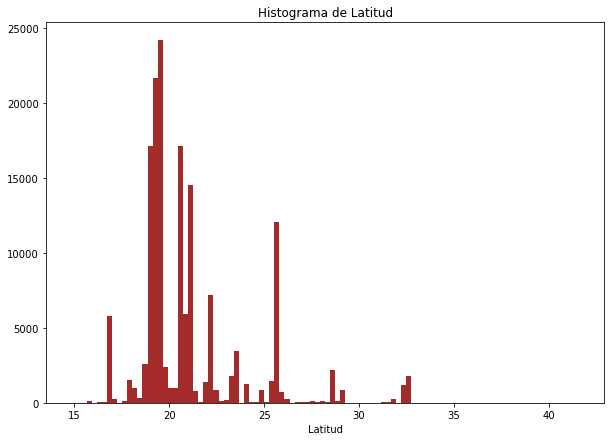

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(df['c_lat'], bins = 100, color = 'brown')
plt.xlabel('Latitud')
plt.title('Histograma de Latitud')
plt.savefig('graficas/hist_lat.png', dpi = 200)
plt.show()

_Observamos que existen valores mayores a 35 gracias al eje horizotal de la gráfica, estos son valores extremos ya que no tienen muchos registros_

### Longitud

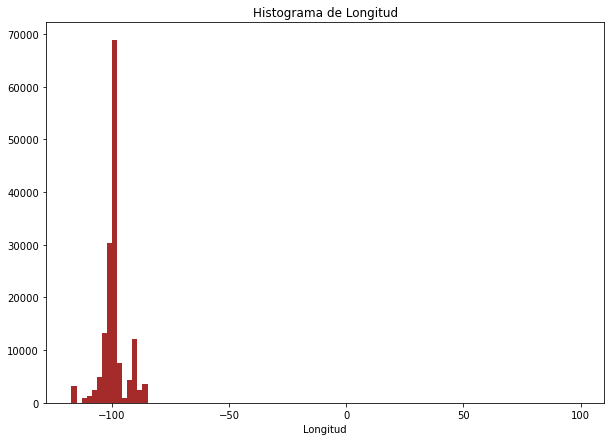

In [22]:
plt.figure(figsize=(10, 7))
plt.hist(df['c_lon'], bins = 100, color = 'brown')
plt.xlabel('Longitud')
plt.title('Histograma de Longitud')
plt.savefig('graficas/hist_long.png', dpi = 200)
plt.show()

_Existen valores mayores a -60, los cuales son valores extremos y serán eliminados o ajustados_

### Estados

In [23]:
conteo_estados = df['v_estado'].value_counts()
conteo_estados

Distrito Federal                   27911
Estado de MÃ©xico                  20747
Veracruz de Ignacio de la Llave    13747
YucatÃ¡n                           13737
Nuevo LeÃ³n                        13537
QuerÃ©taro                         13535
Morelos                            13531
Puebla                             10358
Jalisco                             7158
Quintana Roo                        6953
San Luis PotosÃ­                    5344
Guerrero                            5333
Tamaulipas                          5082
Chiapas                             4329
Baja California                     3883
Chihuahua                           3315
Sinaloa                             3127
Guanajuato                          3008
Tabasco                             2147
Hidalgo                             1672
Aguascalientes                      1511
Baja California Sur                 1491
Sonora                              1374
Colima                              1173
Nayarit         

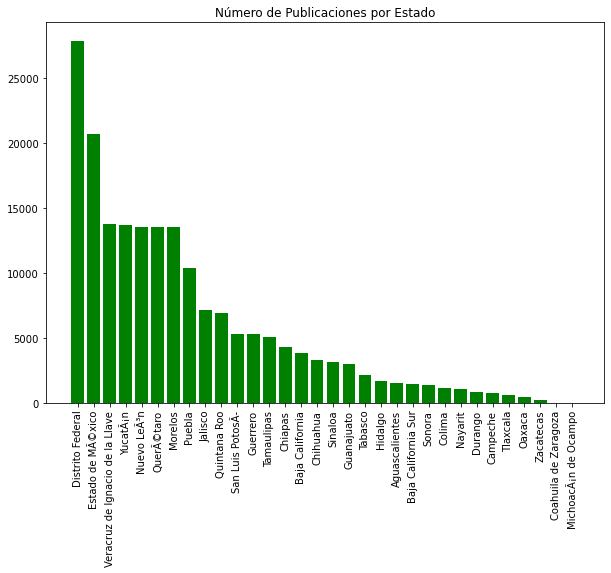

In [24]:
plt.figure(figsize=(10, 7))
plt.bar(conteo_estados.index, conteo_estados.values, color = 'green')
plt.xticks(rotation=90)
plt.title('Número de Publicaciones por Estado')
plt.savefig('graficas/pub_por_est.png', dpi = 200)
plt.show()

In [25]:
price = pd.pivot_table(df, values = 'c_price_aprox_local_currency', index = 'v_estado', aggfunc = np.median)
price.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price = pd.Series(index = price.index, data = [x[0] for x in price.values])
price

v_estado
Quintana Roo                       2774670.350
Nuevo LeÃ³n                        2566570.100
Baja California Sur                2368661.330
Morelos                            2081002.720
Puebla                             1932817.880
QuerÃ©taro                         1882811.910
Distrito Federal                   1789662.250
Jalisco                            1783716.690
YucatÃ¡n                           1689794.000
Guanajuato                         1444981.815
Estado de MÃ©xico                  1437441.585
Sinaloa                            1338104.770
Chiapas                            1337787.470
San Luis PotosÃ­                   1288239.680
Oaxaca                             1288239.680
Nayarit                            1238985.860
Veracruz de Ignacio de la Llave    1238692.070
Guerrero                           1139866.940
Chihuahua                          1050659.920
Coahuila de Zaragoza                973002.825
Aguascalientes                      971134.570
Hida

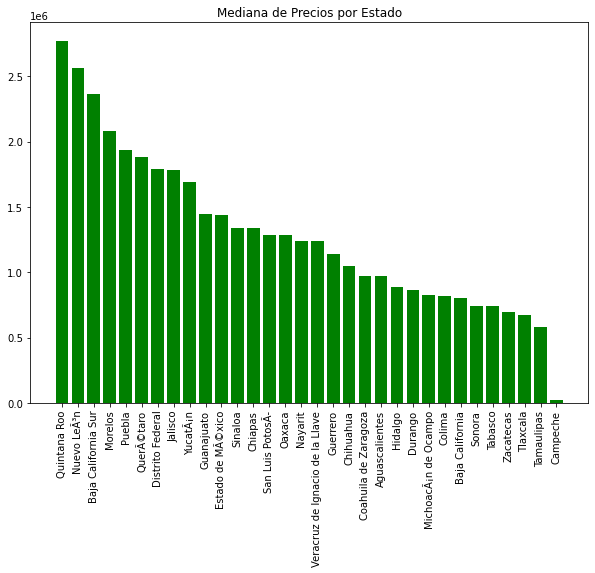

In [26]:
plt.figure(figsize=(10, 7))
plt.bar(price.index, price.values, color = 'green')
plt.xticks(rotation=90)
plt.title('Mediana de Precios por Estado')
plt.savefig('graficas/median_prec_est.png', dpi = 200)
plt.show()

### Municipios

In [27]:
conteo_municipios = df['v_municipio'].value_counts()[0:10]
conteo_municipios

MÃ©rida             12174
QuerÃ©taro          10043
Veracruz             9892
Benito JuÃ¡rez       8889
Cuernavaca           6255
Monterrey            5724
San Luis PotosÃ­     5010
Miguel Hidalgo       4640
                     4516
Puebla               4362
Name: v_municipio, dtype: int64

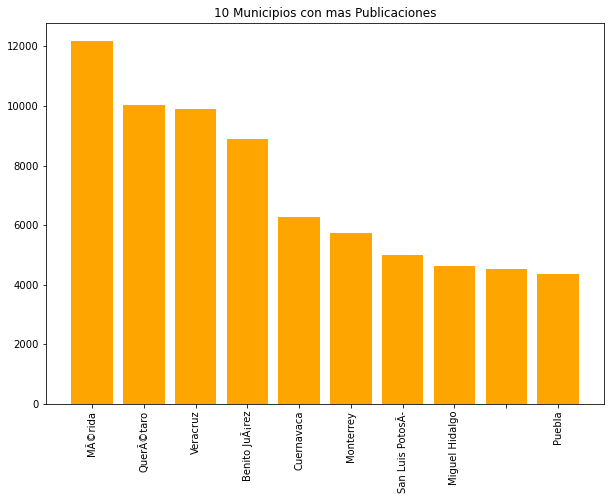

In [28]:
plt.figure(figsize=(10, 7))
plt.bar(conteo_municipios.index, conteo_municipios.values, color = 'orange')
plt.xticks(rotation=90)
plt.title('10 Municipios con mas Publicaciones')
plt.savefig('graficas/mun_public.png', dpi = 200)
plt.show()

In [29]:
price_m = pd.pivot_table(df, values = 'c_price_aprox_local_currency', index = 'v_municipio', aggfunc = np.median)
price_m.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price_m = pd.Series(index = price_m.index, data = [x[0] for x in price_m.values])[0:10]
price_m

v_municipio
El Grullo                   6.018720e+07
Temascalapa                 2.138070e+07
Rayones                     1.783717e+07
Villa de Tezontepec         1.615638e+07
CoatlÃ¡n del RÃ­o           1.598722e+07
MocochÃ¡                    1.511563e+07
San Francisco de Conchos    1.486431e+07
RÃ­o Grande                 1.305884e+07
Suma                        1.288545e+07
Galeana                     1.259072e+07
dtype: float64

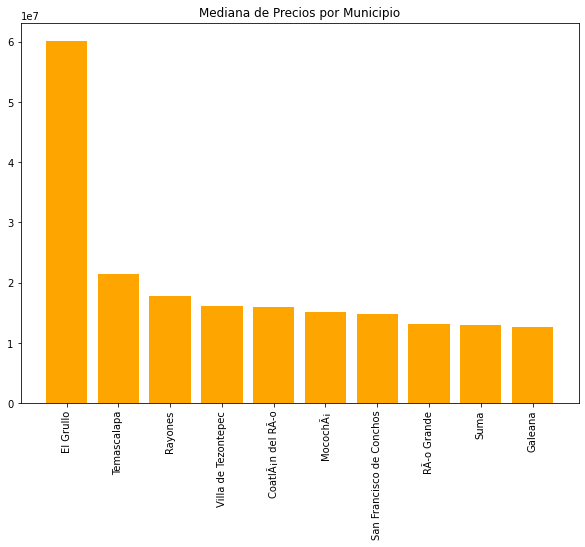

In [30]:
plt.figure(figsize=(10, 7))
plt.bar(price_m.index, price_m.values, color = 'orange')
plt.xticks(rotation=90)
plt.title('Mediana de Precios por Municipio')
plt.savefig('graficas/prec_muni.png', dpi = 200)
plt.show()

_Esta informacion puede tener sesgo ya que pueden existir municipios con datos únicos y precios muy caros, por lo que no indica un valor real por municipio, se usara la suma de precios para observar los 10 municipios con más publicaciones y mayores precios_

In [31]:
price_s = pd.pivot_table(df, values = 'c_price_aprox_local_currency', index = 'v_municipio', aggfunc = np.sum)
price_s.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price_s = pd.Series(index = price_s.index, data = [x[0] for x in price_s.values])[0:10]
price_s

v_municipio
Miguel Hidalgo             4.057065e+10
Benito JuÃ¡rez             3.782285e+10
San Pedro Garza GarcÃ­a    3.654061e+10
MÃ©rida                    3.030658e+10
QuerÃ©taro                 2.700693e+10
Monterrey                  2.483438e+10
Cuernavaca                 2.401454e+10
Veracruz                   1.821099e+10
Ãlvaro ObregÃ³n           1.691574e+10
AtizapÃ¡n de Zaragoza      1.680759e+10
dtype: float64

/home/edco17/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/edco17/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


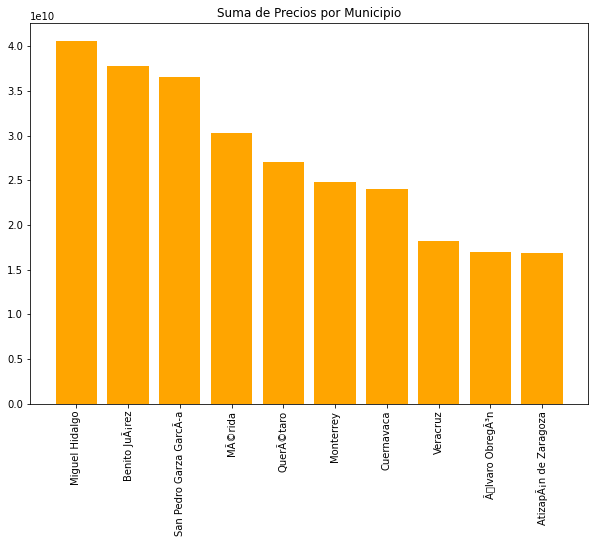

In [32]:
plt.figure(figsize=(10, 7))
plt.bar(price_s.index, price_s.values, color = 'orange')
plt.xticks(rotation=90)
plt.title('Suma de Precios por Municipio')
plt.savefig('graficas/sum_pre_mun.png', dpi = 200)
plt.show()

### Precios vs Renta

In [33]:
operation = df['v_operation'].value_counts()

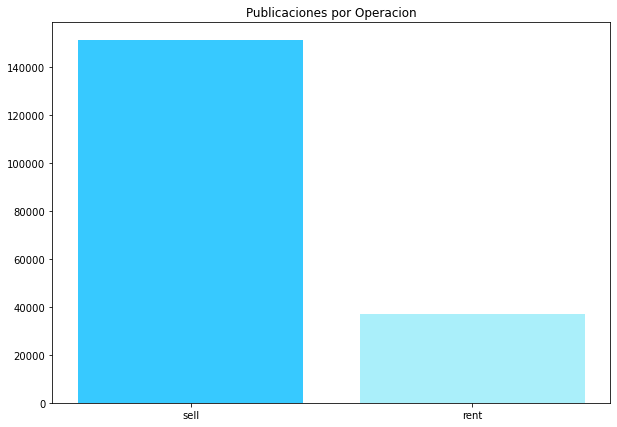

In [34]:
plt.figure(figsize=(10, 7))
plt.bar(x = operation.index, height = operation.values, color = ['#37C9FF', '#aaeffa'])
plt.title('Publicaciones por Operacion')
plt.savefig('graficas/venta_renta.png', dpi = 200)
plt.show()

### Precios Ventas

In [35]:
precio_venta = df[df['v_operation'] == 'sell']['c_price_aprox_local_currency']

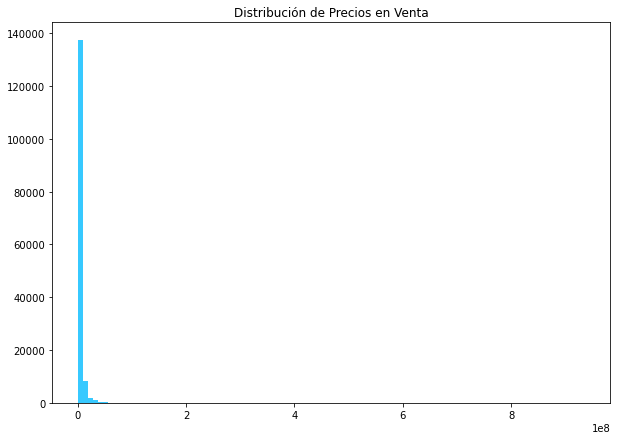

In [36]:
plt.figure(figsize=(10, 7))
plt.hist(precio_venta.values, bins = 100, color = '#37C9FF')
plt.title('Distribución de Precios en Venta')
plt.savefig('graficas/dist_prec.png', dpi = 200)
plt.show()

_Existen registros que son mayores a los 900 millones de pesos, estos se deben de revisar, se tomara un rango entre 0 y 15 millones de pesos para observar la distribucion de precios_

In [61]:
ope = df['v_operation'] == 'sell'
rango = df['c_price_aprox_local_currency'] <= 7000000
precio_venta_2 = df[ope & rango]['c_price_aprox_local_currency']

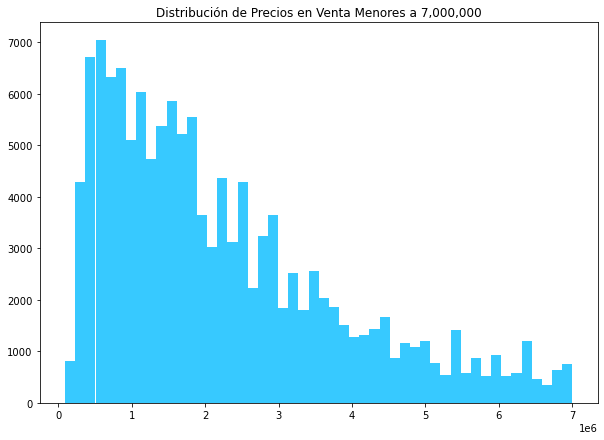

In [62]:
plt.figure(figsize=(10, 7))
plt.hist(precio_venta_2.values, bins = 50, color = '#37C9FF')
plt.title('Distribución de Precios en Venta Menores a 7,000,000')
plt.savefig('graficas/dist_prec_7M.png', dpi = 200)
plt.show()

### Precio Renta

In [39]:
precio_renta = df[df['v_operation'] == 'rent']['c_price_aprox_local_currency']

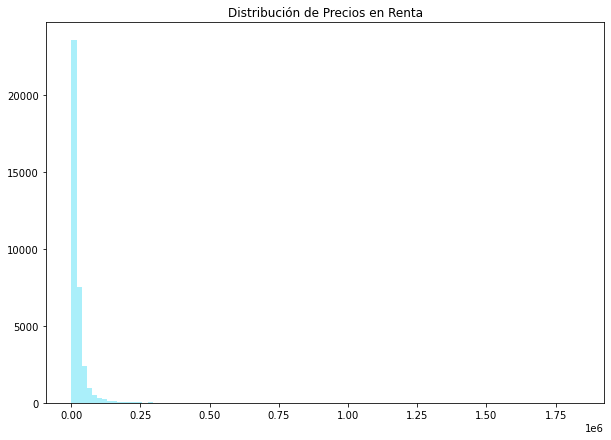

In [40]:
plt.figure(figsize=(10, 7))
plt.hist(precio_renta.values, bins = 100, color = '#aaeffa')
plt.title('Distribución de Precios en Renta')
plt.savefig('graficas/dist_prec_renta.png', dpi = 200)
plt.show()

In [41]:
ope_r = df['v_operation'] == 'rent'
rango_r = df['c_price_aprox_local_currency'] <= 250000
precio_venta_2_r = df[ope_r & rango_r]['c_price_aprox_local_currency']

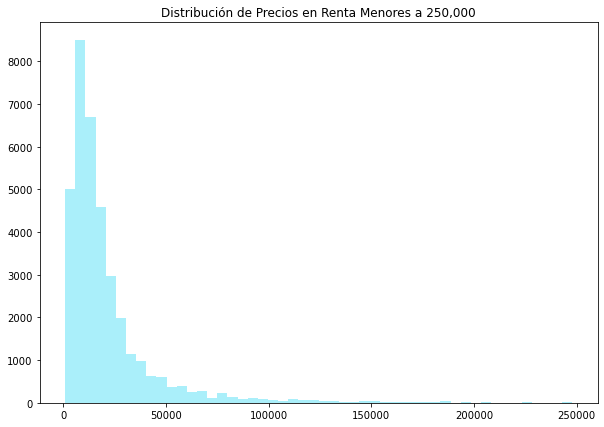

In [42]:
plt.figure(figsize=(10, 7))
plt.hist(precio_venta_2_r.values, bins = 50, color = '#aaeffa')
plt.title('Distribución de Precios en Renta Menores a 250,000')
plt.savefig('graficas/dist_prec_renta_250m.png', dpi = 200)
plt.show()

### Moneda

In [43]:
moneda = df['v_currency'].value_counts()

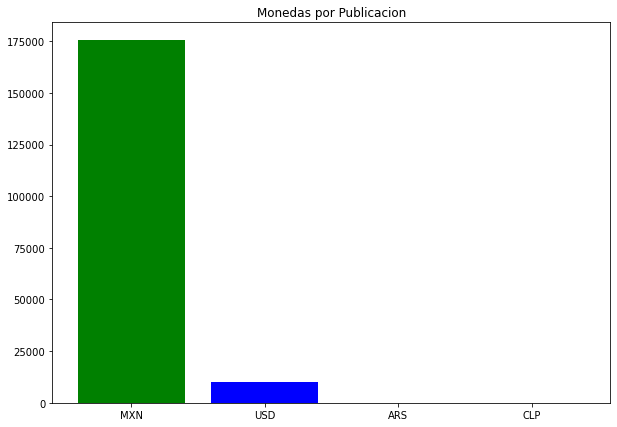

In [44]:
plt.figure(figsize=(10, 7))
plt.bar(moneda.index, moneda.values, color = ['green', 'blue', 'aqua', 'yellow'])
plt.title('Monedas por Publicacion')
plt.savefig('graficas/dist_moneda.png', dpi = 200)
plt.show()

_Se revisaran las publicaciones con moneda distinta al peso mexicano_

### Tipo de Inmueble

In [45]:
casa = pd.pivot_table(df[df['v_property_type'] == 'house'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

depa = pd.pivot_table(df[df['v_property_type'] == 'apartment'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

ph = pd.pivot_table(df[df['v_property_type'] == 'PH'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

tienda = pd.pivot_table(df[df['v_property_type'] == 'store'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

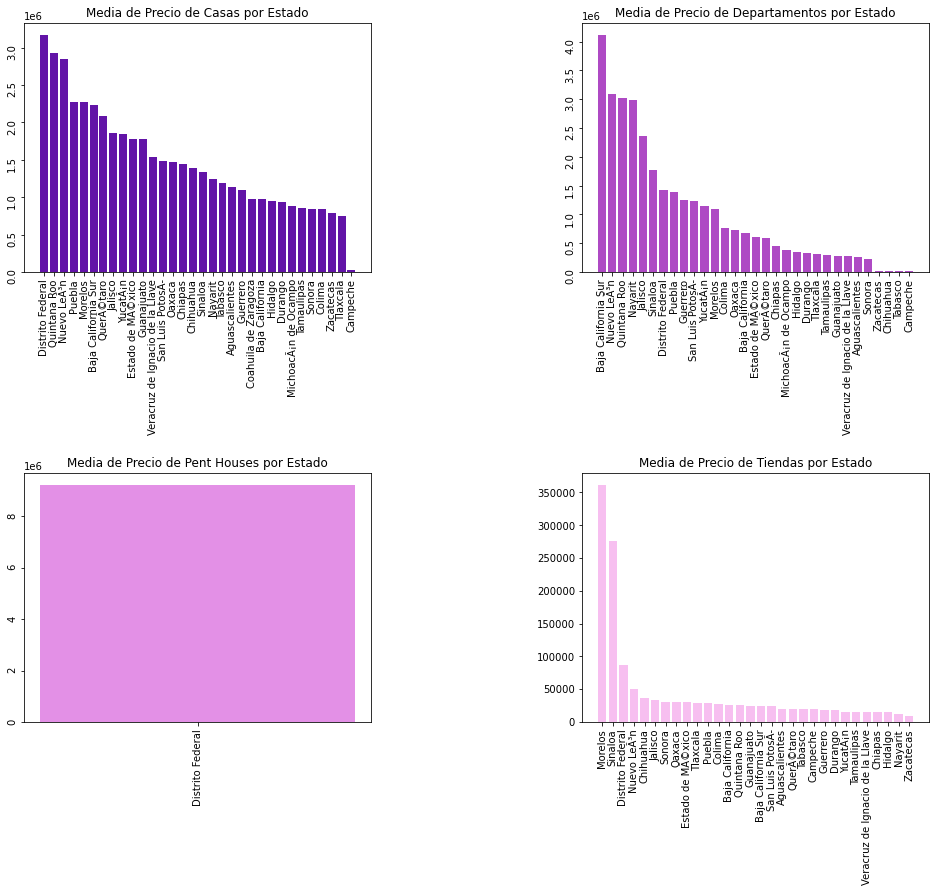

In [46]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))
fig.tight_layout(pad=18.0)

# Casas
ax[0][0].bar(casa.index, casa.c_price_aprox_local_currency, color = '#6214a7')
ax[0][0].set_title('Media de Precio de Casas por Estado')
ax[0][0].tick_params(labelrotation=90)

#  Departamentos
ax[0][1].bar(depa.index, depa.c_price_aprox_local_currency, color = '#ae4ac4')
ax[0][1].set_title('Media de Precio de Departamentos por Estado')
ax[0][1].tick_params(labelrotation=90)

# Pent House
ax[1][0].bar(ph.index, ph.c_price_aprox_local_currency, color = '#e390e6')
ax[1][0].set_title('Media de Precio de Pent Houses por Estado')
ax[1][0].tick_params(labelrotation=90)

# Tienda
ax[1][1].bar(tienda.index, tienda.c_price_aprox_local_currency, color = '#f7bff0')
ax[1][1].set_title('Media de Precio de Tiendas por Estado')
plt.xticks(rotation = 90)

plt.savefig('graficas/dist_tipo.png', dpi = 200)
plt.show()

## d_created_on to Datetime

In [47]:
df['d_created_on'] = pd.to_datetime(df['d_created_on'], format='%d/%m/%Y')

### Agrupación por Mes

In [48]:
mes_publ = df.set_index('d_created_on').groupby(by=[df.set_index('d_created_on').index.month]).agg('count')['v_operation']
mes_publ

d_created_on
1      4413
2      5418
3      6415
4      9234
5     10635
6     11662
7     12783
8     47026
9     31109
10    43669
11     2696
12     3008
Name: v_operation, dtype: int64

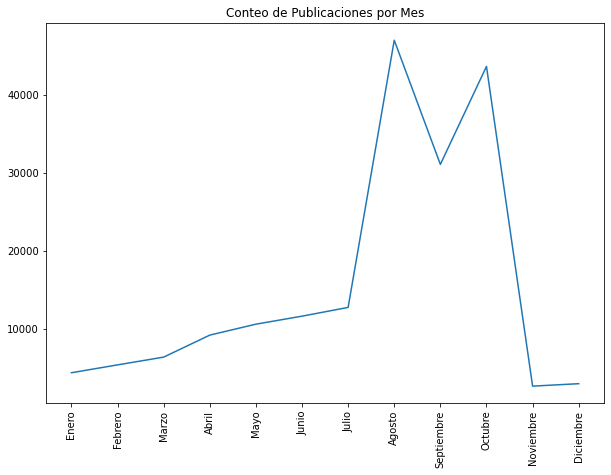

In [49]:
mes_label = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
            'Octubre', 'Noviembre', 'Diciembre']

# Gráfica
plt.figure(figsize=(10, 7))
plt.plot(mes_label, mes_publ.values)
plt.xticks(rotation = 90)
plt.title('Conteo de Publicaciones por Mes')
plt.savefig('graficas/conteo_mes.png', dpi = 200)
plt.show()

### Agrupación por Día

In [50]:
dia_publ = df.set_index('d_created_on').groupby(by=[df.set_index('d_created_on').index.dayofweek]).agg('count')['v_operation']
dia_publ

d_created_on
0    30975
1    19666
2    28551
3    29236
4    29804
5    37340
6    12496
Name: v_operation, dtype: int64

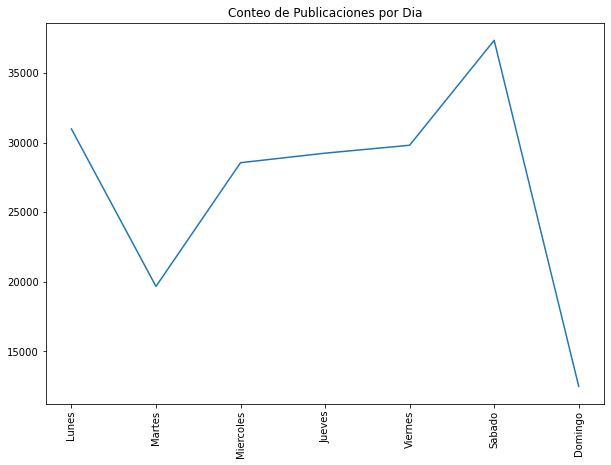

In [51]:
dia_label = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

# Gráfica
plt.figure(figsize=(10, 7))
plt.plot(dia_label, dia_publ.values)
plt.xticks(rotation = 90)
plt.title('Conteo de Publicaciones por Dia')
plt.savefig('graficas/conteo_dia.png', dpi = 200)
plt.show()

### Mediana en Precio por Mes

In [52]:
mes_price = df.set_index('d_created_on').groupby(by=[df.set_index('d_created_on').index.month]).agg('median')['c_price_aprox_local_currency']
mes_price

d_created_on
1     1635073.49
2     1680064.74
3     1808919.33
4     1872628.89
5     1683630.27
6     1585525.89
7     1535978.09
8     1654892.58
9     1442333.11
10    1367840.26
11    1763897.61
12    2076439.96
Name: c_price_aprox_local_currency, dtype: float64

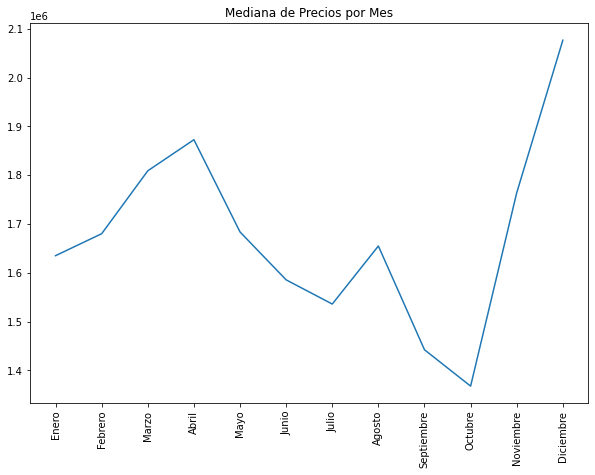

In [63]:
mes_label = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
            'Octubre', 'Noviembre', 'Diciembre']

# Gráfica
plt.figure(figsize=(10, 7))
plt.plot(mes_label, mes_price.values)
plt.xticks(rotation = 90)
plt.title('Mediana de Precios por Mes')
plt.savefig('graficas/precio_mes.png', dpi = 200)
plt.show()

## Superficie

In [54]:
sup_est = df.groupby(by = 'v_estado').agg('median')['c_surface_total_in_m2'].sort_values(ascending=False)
sup_est

v_estado
Morelos                            350.0
YucatÃ¡n                           287.0
Coahuila de Zaragoza               224.0
Chihuahua                          200.0
Baja California Sur                200.0
Colima                             187.0
QuerÃ©taro                         180.0
Estado de MÃ©xico                  165.0
Sonora                             162.0
Guanajuato                         160.0
Aguascalientes                     160.0
Nuevo LeÃ³n                        155.0
Veracruz de Ignacio de la Llave    152.0
Jalisco                            142.0
Puebla                             141.0
Campeche                           141.0
Durango                            128.0
Sinaloa                            126.0
Tabasco                            124.0
Baja California                    120.0
San Luis PotosÃ­                   120.0
Hidalgo                            120.0
Quintana Roo                       118.0
Chiapas                            112.0
Nayarit

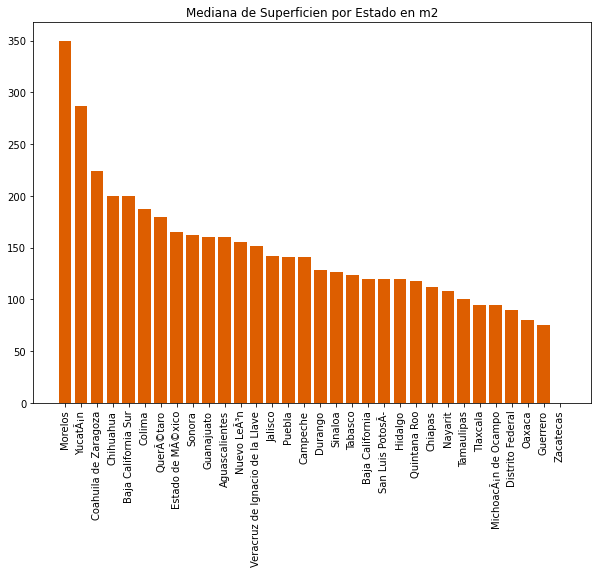

In [55]:
fig = plt.figure(figsize=(10, 7))
plt.bar(sup_est.index, sup_est.values, color = '#dd5e00')
plt.xticks(rotation = 90)
plt.title('Mediana de Superficien por Estado en m2')
plt.savefig('graficas/sup_est.png', dpi = 200)
plt.show()

In [56]:
sup_type = df.groupby(by = ['v_property_type']).agg('median')['c_surface_total_in_m2'].sort_values(ascending=False)
sup_type

v_property_type
PH           220.0
house        200.0
store         80.0
apartment     59.0
Name: c_surface_total_in_m2, dtype: float64

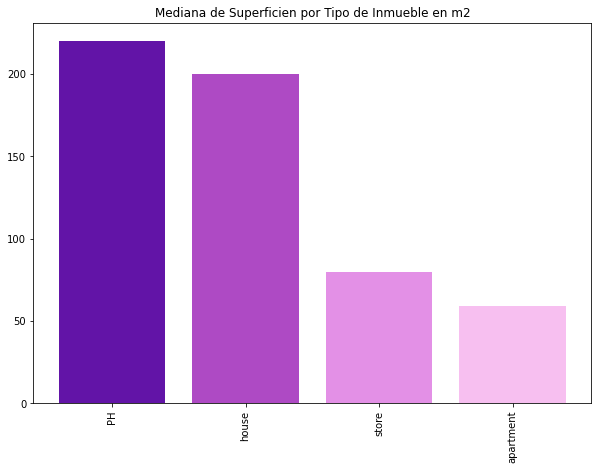

In [57]:
fig = plt.figure(figsize=(10, 7))
plt.bar(sup_type.index, sup_type.values, color = ['#6214a7', '#ae4ac4', '#e390e6', '#f7bff0'])
plt.xticks(rotation = 90)
plt.title('Mediana de Superficien por Tipo de Inmueble en m2')
plt.savefig('graficas/sup_tipo_inmu.png', dpi = 200)
plt.show()